In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon-food-review.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
#1. Data Preparation

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.isna().sum()

id                         0
productid                  0
userid                     0
profilename               16
helpfulnessnumerator       0
helpfulnessdenominator     0
score                      0
time                       0
summary                   27
text                       0
dtype: int64

In [9]:
df = df[df.profilename.notna()]
df = df[df.summary.notna()]

In [10]:
df.isna().sum()

id                        0
productid                 0
userid                    0
profilename               0
helpfulnessnumerator      0
helpfulnessdenominator    0
score                     0
time                      0
summary                   0
text                      0
dtype: int64

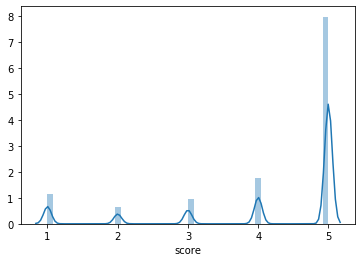

In [11]:
sns.distplot(df.score)

In [12]:
df.loc[(df.score == 5), 'target'] = 2 #class 2: good reviews
df.loc[(df.score == 3) | (df.score == 4), 'target'] = 1 #class 1: so-so reviews, need further improvement
df.loc[(df.score == 1) | (df.score == 2), 'target'] = 0 #class 0: bad reviews

In [13]:
df.target = df.target.astype(int)

In [14]:
df_new = df[['text', 'target']]
df_new = df_new.sample(frac=1).reset_index(drop=True)
df_new = df_new.iloc[:100000,:] #use 10k out of 550k rows to reduce runtime

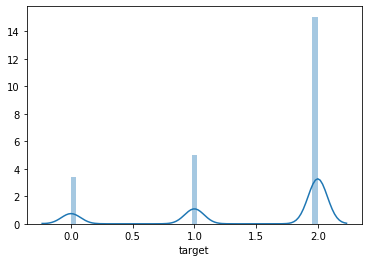

In [15]:
sns.distplot(df_new.target)

In [16]:
df_new.head()

,text,target
0,I've tried all flavors of Primal Spirit Vegan ...,2
1,"Well, it's finally happened...we couldn't make...",2
2,I heard this product worked miracles and it ha...,2
3,RECENTLY (Dec 09) found a superior pasta: La P...,2
4,#1-this stuff tastes great! (very fruity)<br /...,2


In [17]:
df_new.shape

(100000, 2)

In [18]:
#2. Text Preprocessing (Lemmatize, No Punctuation & Stop words, Lowercase)
#3. Text to squence + pad sequences (to equal length)
#4. Modelling

In [19]:
#2. Text Preprocessing

In [20]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])

In [21]:
df_new['lemma'] = df_new.text.apply(lambda row: ' '.join(str(word.lemma_) for word in nlp(row)))

In [22]:
df_new.head()

,text,target,lemma
0,I've tried all flavors of Primal Spirit Vegan ...,2,-PRON- have try all flavor of Primal Spirit Ve...
1,"Well, it's finally happened...we couldn't make...",2,"Well , -PRON- have finally happen ... we could..."
2,I heard this product worked miracles and it ha...,2,I hear this product work miracle and it have p...
3,RECENTLY (Dec 09) found a superior pasta: La P...,2,RECENTLY ( Dec 09 ) find a superior pasta : La...
4,#1-this stuff tastes great! (very fruity)<br /...,2,# 1-this stuff taste great ! ( very fruity)<br...


In [23]:
df_new['no_punct'] = df_new.lemma.apply(lambda row: ' '.join(str(word) for word in nlp(row) if not word.is_punct))

In [24]:
df_new['no_stop'] = df_new.no_punct.apply(lambda row: ' '.join(str(word) for word in nlp(row) if not word.is_stop))

In [25]:
df_new['lowercase'] = df_new.no_stop.apply(lambda row: row.lower())

In [26]:
df_new['final_text'] = df_new.lowercase

In [27]:
df_new.head()

,text,target,lemma,no_punct,no_stop,lowercase,final_text
0,I've tried all flavors of Primal Spirit Vegan ...,2,-PRON- have try all flavor of Primal Spirit Ve...,-PRON- have try all flavor of Primal Spirit Ve...,-PRON- try flavor Primal Spirit Vegan Jerky Me...,-pron- try flavor primal spirit vegan jerky me...,-pron- try flavor primal spirit vegan jerky me...
1,"Well, it's finally happened...we couldn't make...",2,"Well , -PRON- have finally happen ... we could...",Well -PRON- have finally happen we could not m...,-PRON- finally happen husband son favorite hol...,-pron- finally happen husband son favorite hol...,-pron- finally happen husband son favorite hol...
2,I heard this product worked miracles and it ha...,2,I hear this product work miracle and it have p...,I hear this product work miracle and it have p...,hear product work miracle prove Yellow Lab...,hear product work miracle prove yellow lab...,hear product work miracle prove yellow lab...
3,RECENTLY (Dec 09) found a superior pasta: La P...,2,RECENTLY ( Dec 09 ) find a superior pasta : La...,RECENTLY Dec 09 find a superior pasta La Porta...,RECENTLY Dec 09 find superior pasta La Porta <...,recently dec 09 find superior pasta la porta <...,recently dec 09 find superior pasta la porta <...
4,#1-this stuff tastes great! (very fruity)<br /...,2,# 1-this stuff taste great ! ( very fruity)<br...,1-this stuff taste great very fruity)<br />#2-...,1-this stuff taste great fruity)<br />#2-great...,1-this stuff taste great fruity)<br />#2-great...,1-this stuff taste great fruity)<br />#2-great...


In [28]:
#3. Text to sequence 

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size) 
tokenizer.fit_on_texts(df_new.final_text)
sequences = tokenizer.texts_to_sequences(df_new.final_text)

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

word_len = 50
data = pad_sequences(sequences, maxlen = word_len, padding = 'post', truncating = 'post')

In [31]:
#Train test split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, df_new.target, test_size=0.3, 
                                                    shuffle=True, random_state=1024)

In [33]:
#4. Modelling

In [34]:
import tensorflow

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
#4.1. MLP Model
#4.1.1. MLP without Regularizer

Epoch 1/100
2188/2188 - 8s - loss: 0.6771 - accuracy: 0.7179 - val_loss: 0.6156 - val_accuracy: 0.7475
Epoch 2/100
2188/2188 - 8s - loss: 0.4796 - accuracy: 0.8098 - val_loss: 0.6334 - val_accuracy: 0.7497
Epoch 3/100
2188/2188 - 8s - loss: 0.2860 - accuracy: 0.8949 - val_loss: 0.7685 - val_accuracy: 0.7451
Epoch 4/100
2188/2188 - 8s - loss: 0.1591 - accuracy: 0.9463 - val_loss: 1.0013 - val_accuracy: 0.7309
Epoch 5/100
2188/2188 - 8s - loss: 0.0970 - accuracy: 0.9679 - val_loss: 1.2666 - val_accuracy: 0.7206
Epoch 6/100
2188/2188 - 8s - loss: 0.0671 - accuracy: 0.9780 - val_loss: 1.5129 - val_accuracy: 0.7193
Epoch 7/100
2188/2188 - 8s - loss: 0.0496 - accuracy: 0.9837 - val_loss: 1.6992 - val_accuracy: 0.7070
Epoch 8/100
2188/2188 - 8s - loss: 0.0388 - accuracy: 0.9876 - val_loss: 1.8949 - val_accuracy: 0.7138
Epoch 9/100
2188/2188 - 8s - loss: 0.0334 - accuracy: 0.9889 - val_loss: 1.9993 - val_accuracy: 0.7180
Epoch 10/100
2188/2188 - 8s - loss: 0.0272 - accuracy: 0.9909 - val_loss:

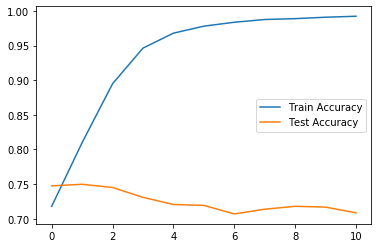

In [37]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [38]:
#4.1.2. MLP with Dropout

Epoch 1/100
2188/2188 - 8s - loss: 0.7500 - accuracy: 0.6933 - val_loss: 0.6287 - val_accuracy: 0.7403
Epoch 2/100
2188/2188 - 8s - loss: 0.5428 - accuracy: 0.7840 - val_loss: 0.6294 - val_accuracy: 0.7455
Epoch 3/100
2188/2188 - 8s - loss: 0.3857 - accuracy: 0.8562 - val_loss: 0.6970 - val_accuracy: 0.7452
Epoch 4/100
2188/2188 - 8s - loss: 0.2587 - accuracy: 0.9087 - val_loss: 0.8598 - val_accuracy: 0.7357
Epoch 5/100
2188/2188 - 8s - loss: 0.1836 - accuracy: 0.9375 - val_loss: 0.9986 - val_accuracy: 0.7330
Epoch 6/100
2188/2188 - 8s - loss: 0.1382 - accuracy: 0.9532 - val_loss: 1.1995 - val_accuracy: 0.7215
Epoch 7/100
2188/2188 - 8s - loss: 0.1086 - accuracy: 0.9631 - val_loss: 1.3815 - val_accuracy: 0.7089
Epoch 8/100
2188/2188 - 8s - loss: 0.0891 - accuracy: 0.9701 - val_loss: 1.5206 - val_accuracy: 0.7137
Epoch 9/100
2188/2188 - 9s - loss: 0.0773 - accuracy: 0.9742 - val_loss: 1.6431 - val_accuracy: 0.7167
Epoch 10/100
2188/2188 - 9s - loss: 0.0670 - accuracy: 0.9778 - val_loss:

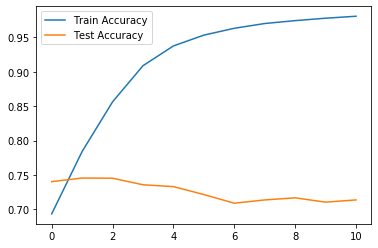

In [39]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [40]:
#4.2. RNN Model

In [41]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional

In [42]:
#4.2.1. Simple RNN

Epoch 1/100
2188/2188 - 34s - loss: 0.8987 - accuracy: 0.6342 - val_loss: 0.8792 - val_accuracy: 0.6393
Epoch 2/100
2188/2188 - 34s - loss: 0.8686 - accuracy: 0.6435 - val_loss: 0.8887 - val_accuracy: 0.6406
Epoch 3/100
2188/2188 - 33s - loss: 0.8492 - accuracy: 0.6490 - val_loss: 0.8754 - val_accuracy: 0.6391
Epoch 4/100
2188/2188 - 33s - loss: 0.8409 - accuracy: 0.6564 - val_loss: 0.8362 - val_accuracy: 0.6652
Epoch 5/100
2188/2188 - 33s - loss: 0.8095 - accuracy: 0.6752 - val_loss: 0.8591 - val_accuracy: 0.6415
Epoch 6/100
2188/2188 - 33s - loss: 0.8017 - accuracy: 0.6749 - val_loss: 0.8292 - val_accuracy: 0.6620
Epoch 7/100
2188/2188 - 34s - loss: 0.7884 - accuracy: 0.6794 - val_loss: 0.8440 - val_accuracy: 0.6344
Epoch 8/100
2188/2188 - 34s - loss: 0.7539 - accuracy: 0.6978 - val_loss: 0.8415 - val_accuracy: 0.6641
Epoch 9/100
2188/2188 - 36s - loss: 0.7663 - accuracy: 0.7012 - val_loss: 0.8663 - val_accuracy: 0.6644
Epoch 10/100
2188/2188 - 38s - loss: 0.7645 - accuracy: 0.7100 -

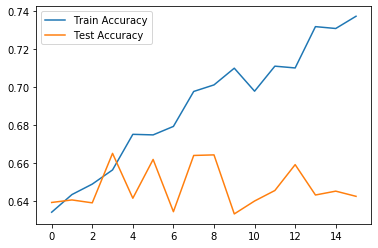

In [43]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(SimpleRNN(32))
model.add(Dense(16, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [44]:
#4.2.2. LSTM

Epoch 1/100
2188/2188 - 51s - loss: 0.8128 - accuracy: 0.6856 - val_loss: 0.7019 - val_accuracy: 0.7137
Epoch 2/100
2188/2188 - 50s - loss: 0.6653 - accuracy: 0.7304 - val_loss: 0.6889 - val_accuracy: 0.7218
Epoch 3/100
2188/2188 - 51s - loss: 0.6183 - accuracy: 0.7540 - val_loss: 0.6756 - val_accuracy: 0.7273
Epoch 4/100
2188/2188 - 54s - loss: 0.5807 - accuracy: 0.7734 - val_loss: 0.6832 - val_accuracy: 0.7260
Epoch 5/100
2188/2188 - 49s - loss: 0.5521 - accuracy: 0.7879 - val_loss: 0.7036 - val_accuracy: 0.7285
Epoch 6/100
2188/2188 - 48s - loss: 0.5226 - accuracy: 0.8056 - val_loss: 0.7560 - val_accuracy: 0.7349
Epoch 7/100
2188/2188 - 48s - loss: 0.4987 - accuracy: 0.8178 - val_loss: 0.7165 - val_accuracy: 0.7285
Epoch 8/100
2188/2188 - 48s - loss: 0.4792 - accuracy: 0.8296 - val_loss: 0.7207 - val_accuracy: 0.7316
Epoch 9/100
2188/2188 - 48s - loss: 0.4580 - accuracy: 0.8423 - val_loss: 0.7467 - val_accuracy: 0.7269
Epoch 10/100
2188/2188 - 48s - loss: 0.4397 - accuracy: 0.8525 -

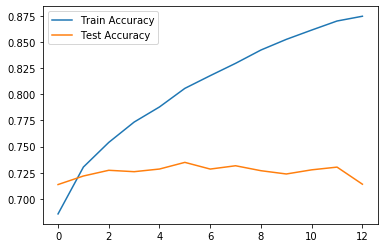

In [47]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(LSTM(16))
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'tanh', kernel_regularizer = 'l1'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

Epoch 1/100
2188/2188 - 49s - loss: 0.7434 - accuracy: 0.6983 - val_loss: 0.6641 - val_accuracy: 0.7184
Epoch 2/100
2188/2188 - 48s - loss: 0.6231 - accuracy: 0.7423 - val_loss: 0.6473 - val_accuracy: 0.7291
Epoch 3/100
2188/2188 - 48s - loss: 0.5732 - accuracy: 0.7699 - val_loss: 0.6424 - val_accuracy: 0.7392
Epoch 4/100
2188/2188 - 48s - loss: 0.5282 - accuracy: 0.7950 - val_loss: 0.6495 - val_accuracy: 0.7399
Epoch 5/100
2188/2188 - 48s - loss: 0.4918 - accuracy: 0.8131 - val_loss: 0.6477 - val_accuracy: 0.7400
Epoch 6/100
2188/2188 - 50s - loss: 0.4578 - accuracy: 0.8291 - val_loss: 0.6748 - val_accuracy: 0.7380
Epoch 7/100
2188/2188 - 48s - loss: 0.4288 - accuracy: 0.8422 - val_loss: 0.6869 - val_accuracy: 0.7386
Epoch 8/100
2188/2188 - 48s - loss: 0.4016 - accuracy: 0.8547 - val_loss: 0.7123 - val_accuracy: 0.7408
Epoch 9/100
2188/2188 - 48s - loss: 0.3775 - accuracy: 0.8655 - val_loss: 0.7487 - val_accuracy: 0.7377
Epoch 10/100
2188/2188 - 48s - loss: 0.3578 - accuracy: 0.8726 -

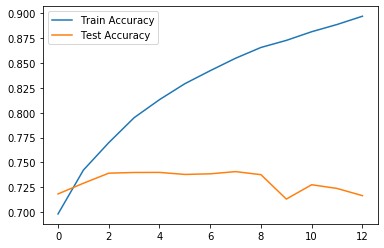

In [48]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(LSTM(16))
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'tanh', kernel_regularizer = 'l2'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

Epoch 1/100
2188/2188 - 60s - loss: 0.9372 - accuracy: 0.6404 - val_loss: 0.8786 - val_accuracy: 0.6393
Epoch 2/100
2188/2188 - 59s - loss: 0.8685 - accuracy: 0.6402 - val_loss: 0.8495 - val_accuracy: 0.6393
Epoch 3/100
2188/2188 - 58s - loss: 0.8637 - accuracy: 0.6389 - val_loss: 0.8570 - val_accuracy: 0.6393
Epoch 4/100
2188/2188 - 58s - loss: 0.8679 - accuracy: 0.6400 - val_loss: 0.8675 - val_accuracy: 0.6393
Epoch 5/100
2188/2188 - 58s - loss: 0.8303 - accuracy: 0.6485 - val_loss: 0.8044 - val_accuracy: 0.6883
Epoch 6/100
2188/2188 - 61s - loss: 0.7831 - accuracy: 0.6877 - val_loss: 0.7432 - val_accuracy: 0.6974
Epoch 7/100
2188/2188 - 59s - loss: 0.7472 - accuracy: 0.6958 - val_loss: 0.7195 - val_accuracy: 0.6931
Epoch 8/100
2188/2188 - 58s - loss: 0.7115 - accuracy: 0.7049 - val_loss: 0.7025 - val_accuracy: 0.7087
Epoch 9/100
2188/2188 - 58s - loss: 0.6689 - accuracy: 0.7257 - val_loss: 0.6957 - val_accuracy: 0.7164
Epoch 10/100
2188/2188 - 60s - loss: 0.6426 - accuracy: 0.7377 -

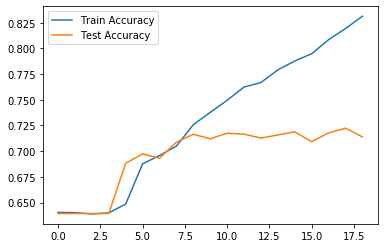

In [51]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=word_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'tanh', kernel_regularizer = 'l2'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'tanh', kernel_regularizer = 'l2'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'tanh', kernel_regularizer = 'l2'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [ ]:
#4.2.3. Bidirectional wrapped with LSTM

Epoch 1/100
2188/2188 - 57s - loss: 0.7256 - accuracy: 0.7031 - val_loss: 0.6455 - val_accuracy: 0.7381
Epoch 2/100
2188/2188 - 55s - loss: 0.5977 - accuracy: 0.7605 - val_loss: 0.6285 - val_accuracy: 0.7462
Epoch 3/100
2188/2188 - 54s - loss: 0.5497 - accuracy: 0.7833 - val_loss: 0.6302 - val_accuracy: 0.7493
Epoch 4/100
2188/2188 - 56s - loss: 0.5106 - accuracy: 0.8021 - val_loss: 0.6335 - val_accuracy: 0.7468
Epoch 5/100
2188/2188 - 55s - loss: 0.4743 - accuracy: 0.8193 - val_loss: 0.6718 - val_accuracy: 0.7447
Epoch 6/100
2188/2188 - 56s - loss: 0.4420 - accuracy: 0.8330 - val_loss: 0.6865 - val_accuracy: 0.7407
Epoch 7/100
2188/2188 - 56s - loss: 0.4117 - accuracy: 0.8444 - val_loss: 0.7532 - val_accuracy: 0.7399
Epoch 8/100
2188/2188 - 56s - loss: 0.3852 - accuracy: 0.8565 - val_loss: 0.7434 - val_accuracy: 0.7403
Epoch 9/100
2188/2188 - 56s - loss: 0.3637 - accuracy: 0.8650 - val_loss: 0.7849 - val_accuracy: 0.7404
Epoch 10/100
2188/2188 - 56s - loss: 0.3396 - accuracy: 0.8739 -

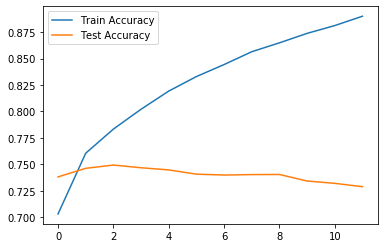

In [53]:
#Define

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=word_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'tanh', kernel_regularizer = 'l2'))
model.add(Dense(3, activation = 'softmax'))

#Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit 
es = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                    epochs=100, batch_size=32, verbose=2, callbacks = [es])

#Evaluate
loss_train, acc_train = model.evaluate(x_train, y_train)
loss_test, acc_test = model.evaluate(x_test, y_test)

#Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()